## Import

In [128]:
from statistics import LinearRegression

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np


df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['Q'] = df['date'].dt.to_period('Q').astype(str)
countries_df = pd.read_csv('countries_combined_data.csv')

## Część 1

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:


1.1. liczby nowych zachorowań,



                                                 location_key  \
date                                                            
2020-12-14                                                 US   
2020-12-15                                                 US   
2020-12-16                                                 US   
2020-12-17                                                 US   
2020-12-18                                                 US   
...                                                       ...   
2022-09-12  MY_16AU_TASMY_08MY_09CH_OWAU_QLDMY_11MY_10MY_1...   
2022-09-13  MY_16AU_NTMY_12AU_NSWMY_02MY_04AU_SAAU_VICMY_0...   
2022-09-14  AU_ACTAU_NTAU_VICAU_SAAU_QLDAU_WAAU_TASAU_NSWA...   
2022-09-15                                           AU_VICAU   
2022-09-16                                                 AU   

                                            subregion1_code_x  \
date                                                            
2020-12-14              

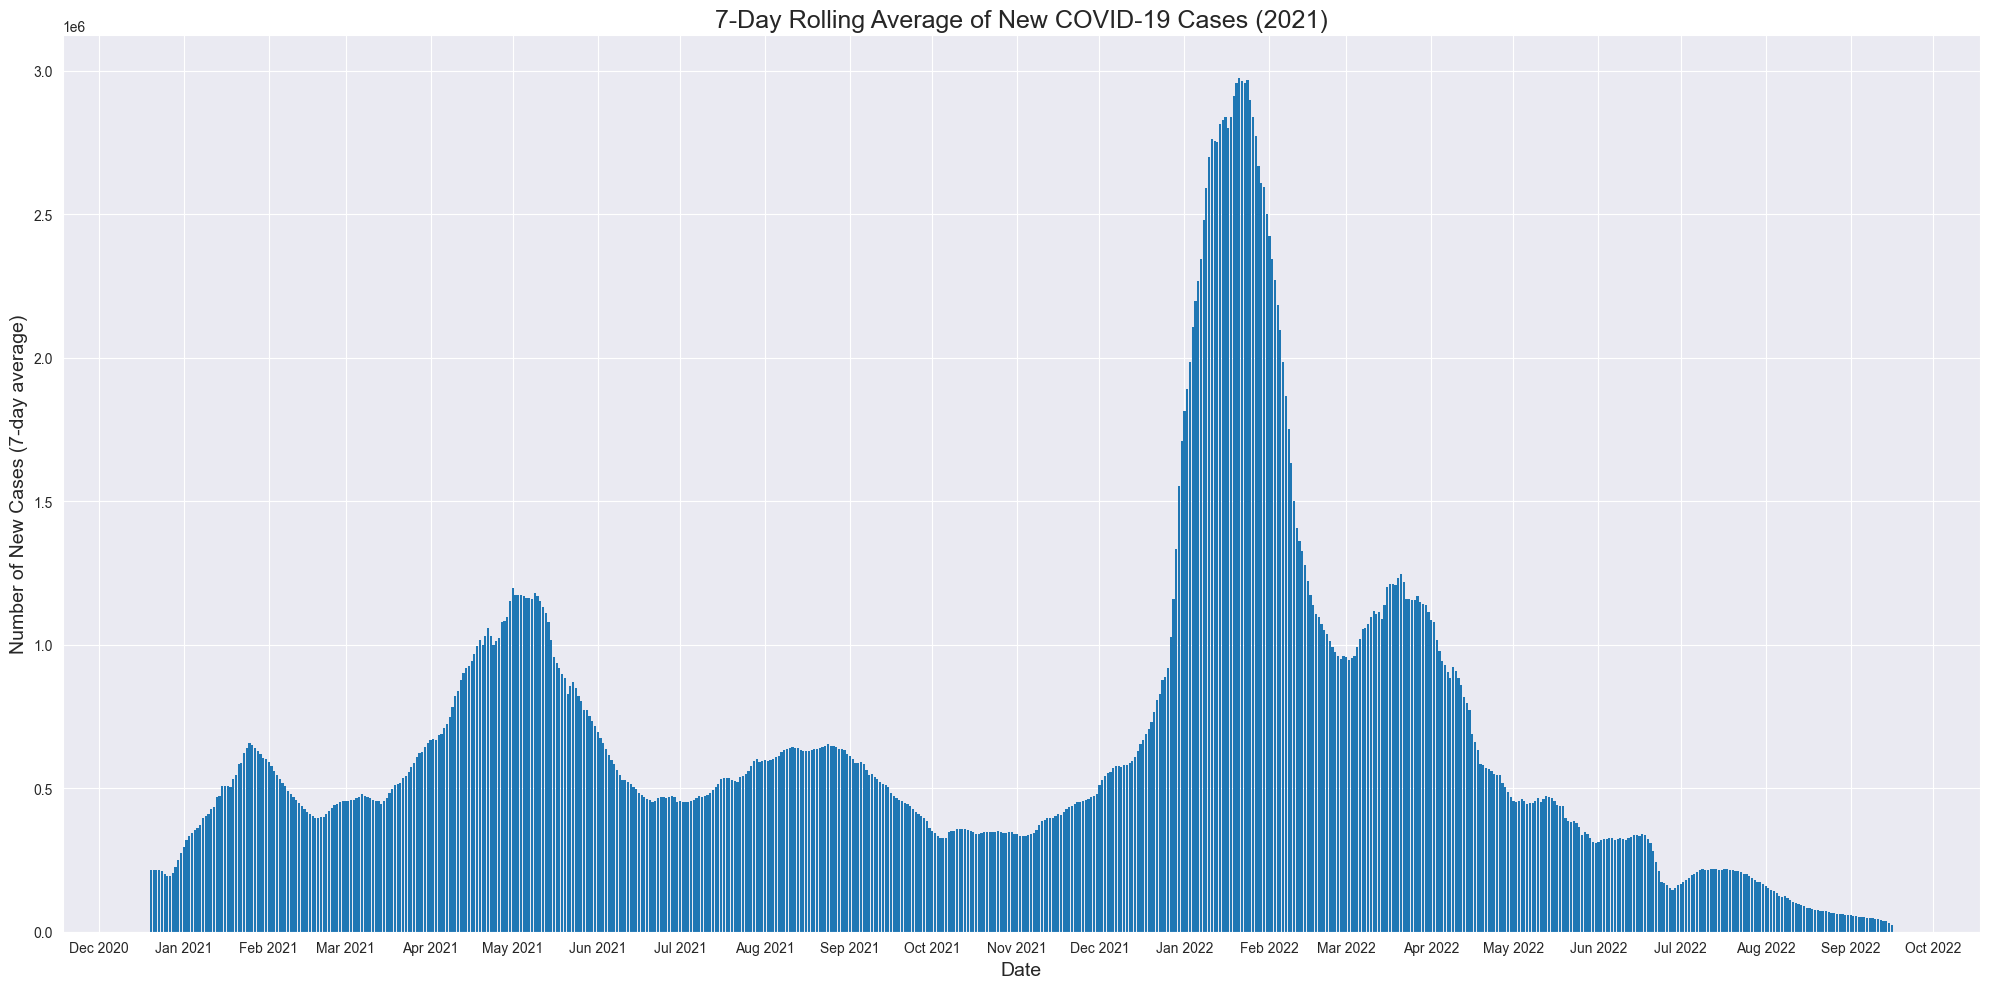

In [129]:
df_daily = df[df['subregion1_name_x'].isna()]
df_daily = df.set_index('date').resample('D').sum()
print(df_daily)
df_daily['rolling_mean'] = df_daily['new_confirmed'].rolling(window=7).mean()
df_daily = df_daily.reset_index()  # Reset index to make 'date' a column again

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean'], edgecolor='none')  # Remove black outline

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Cases (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Cases (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # 'Jan 2025', 'Feb 2025', etc.
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.tight_layout()
plt.show()

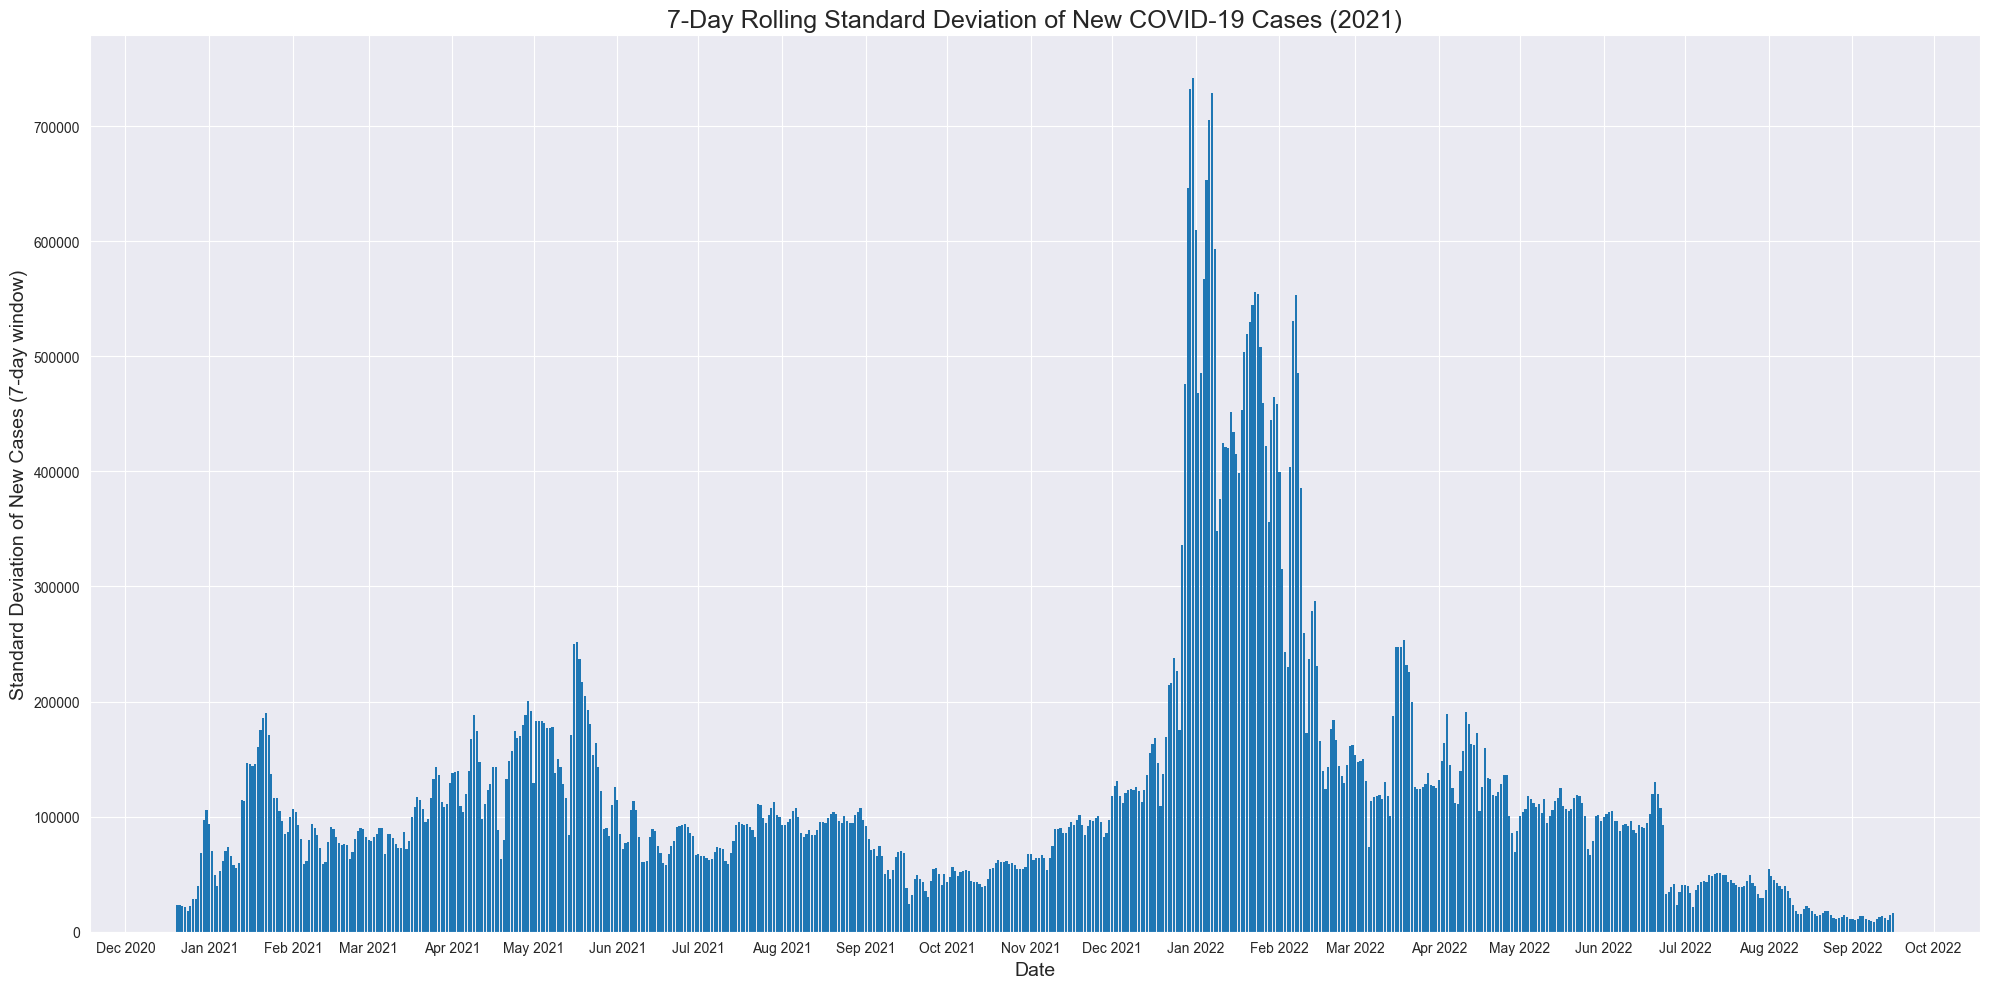

In [130]:
# Calculate 7-day rolling standard deviation for new confirmed cases
df_daily['rolling_std'] = df_daily['new_confirmed'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Cases (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Cases (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.2. liczby nowych śmierci,



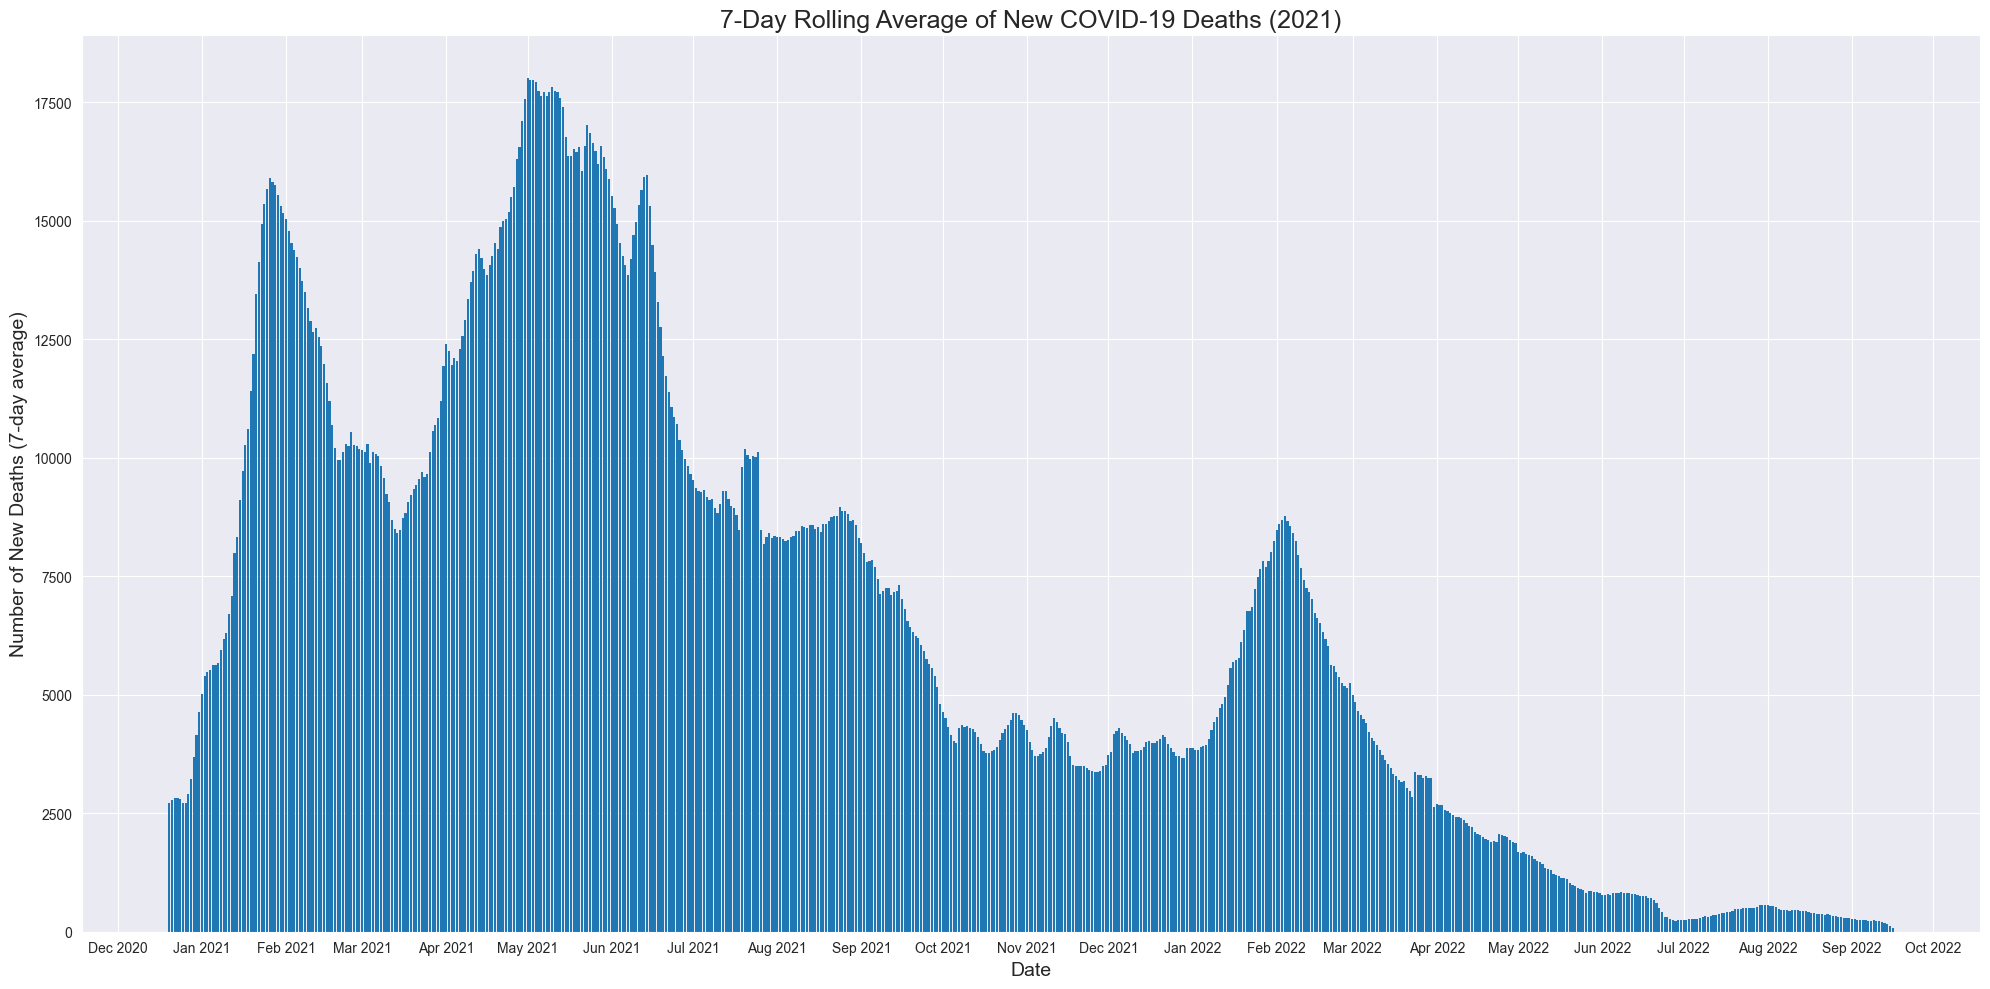

In [131]:
# Calculate 7-day rolling mean for new deaths
df_daily['rolling_mean_deaths'] = df_daily['new_deceased'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_deaths'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Deaths (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Deaths (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

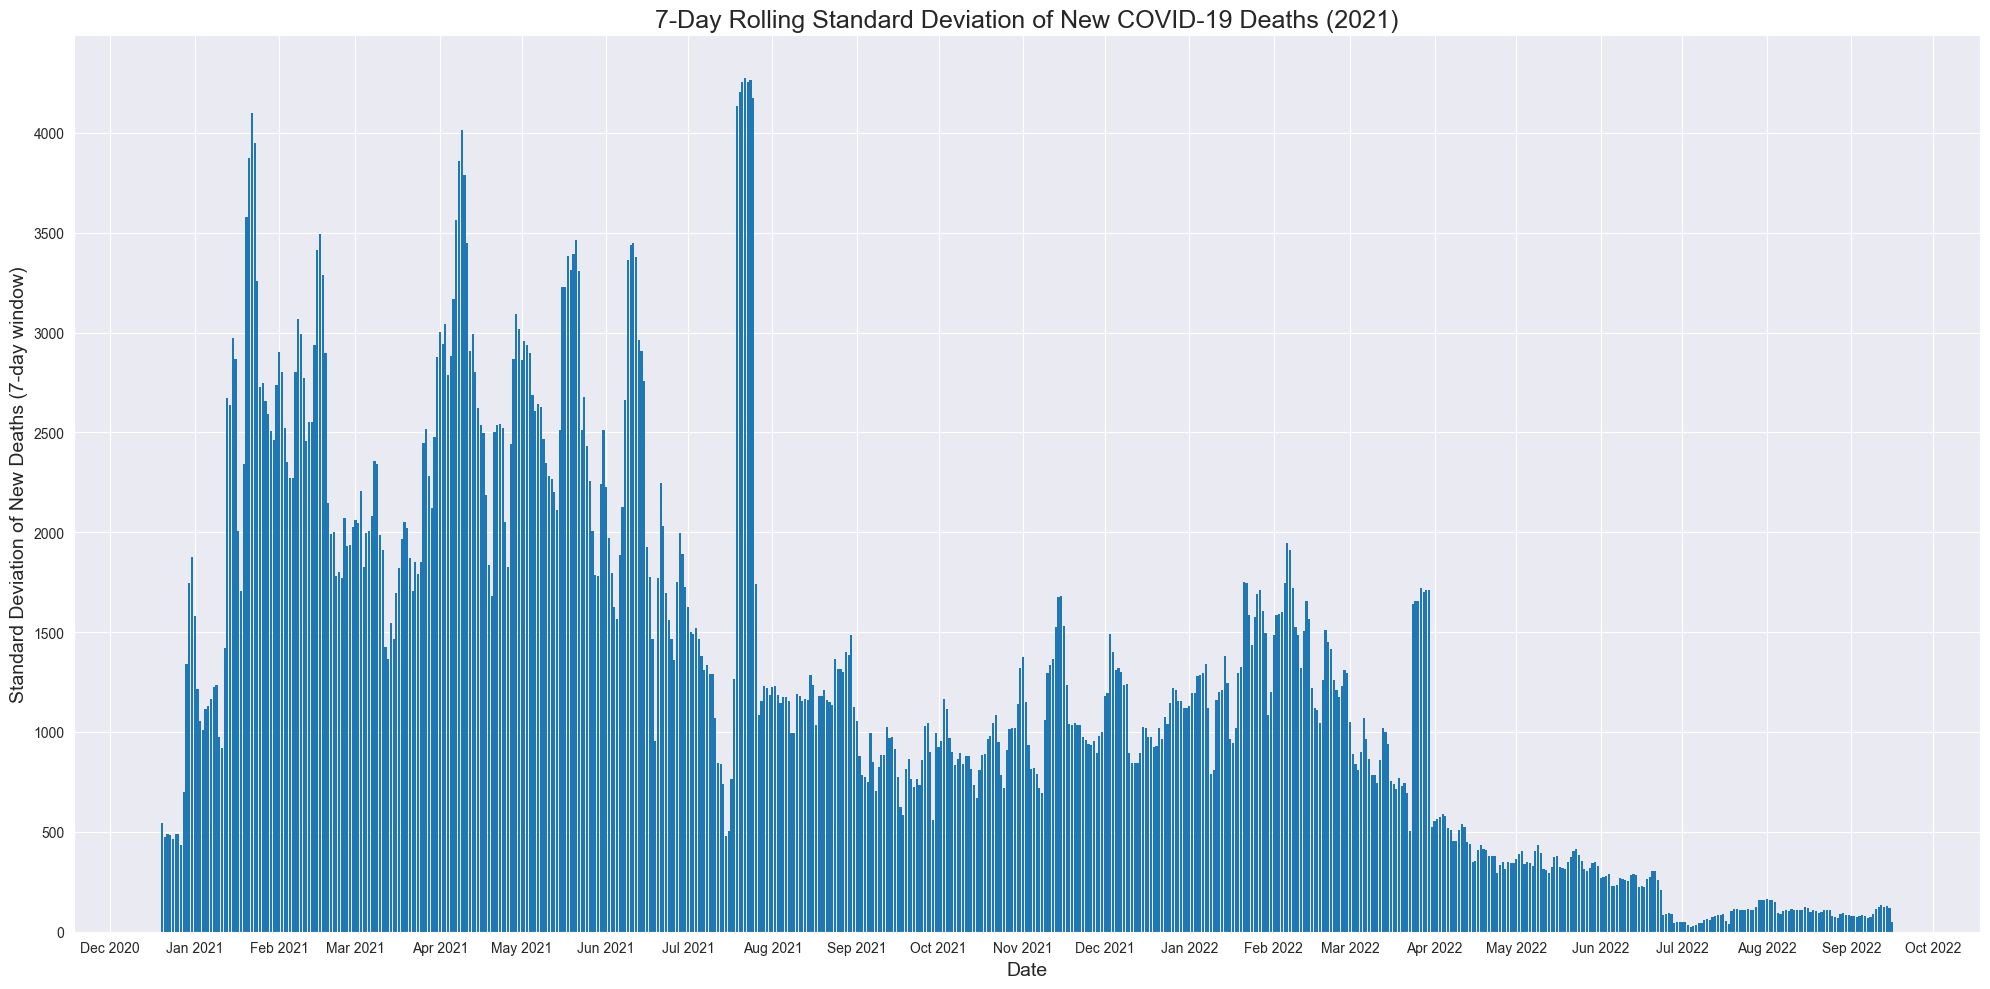

In [132]:
# Calculate 7-day rolling standard deviation for new deaths
df_daily['rolling_std_deaths'] = df_daily['new_deceased'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_deaths'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Deaths (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Deaths (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.3. liczby nowych szczepień,



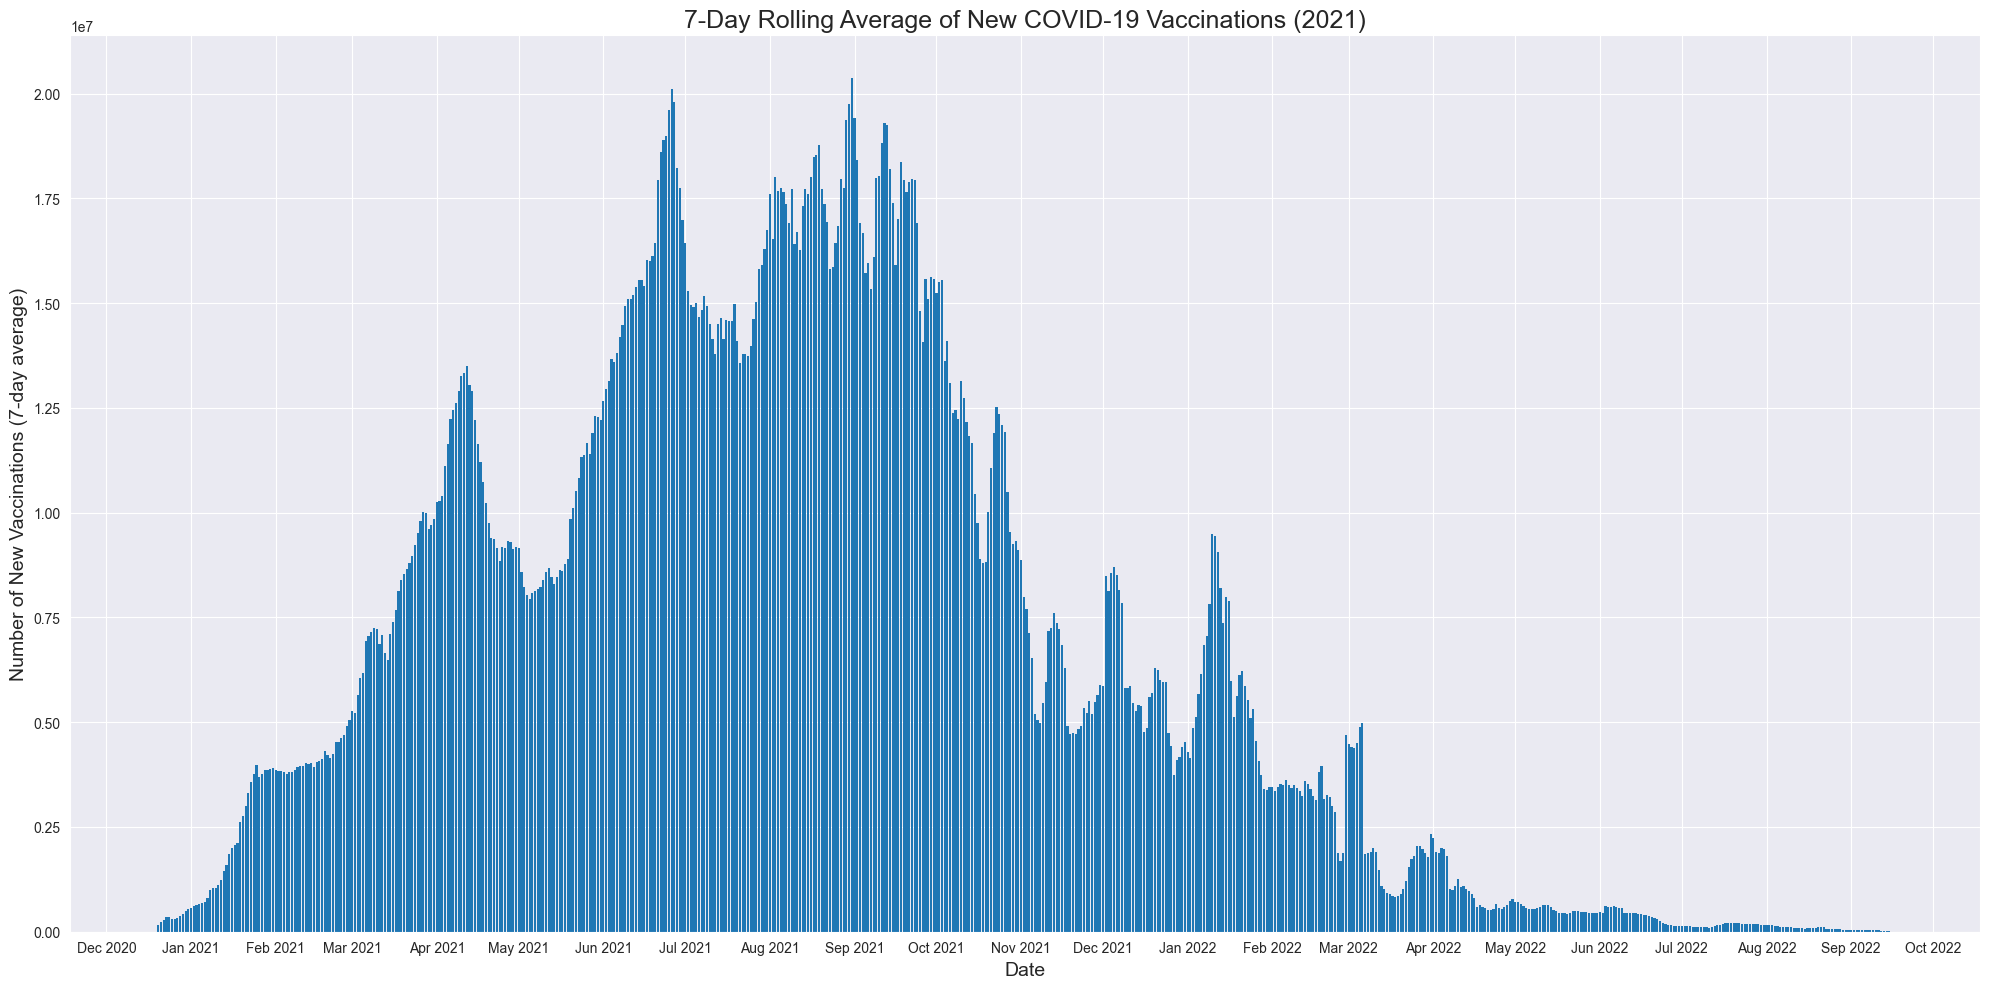

In [133]:
# Calculate 7-day rolling mean for new vaccinations
df_daily['rolling_mean_vaccinations'] = df_daily['new_persons_vaccinated'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_vaccinations'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Vaccinations (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccinations (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

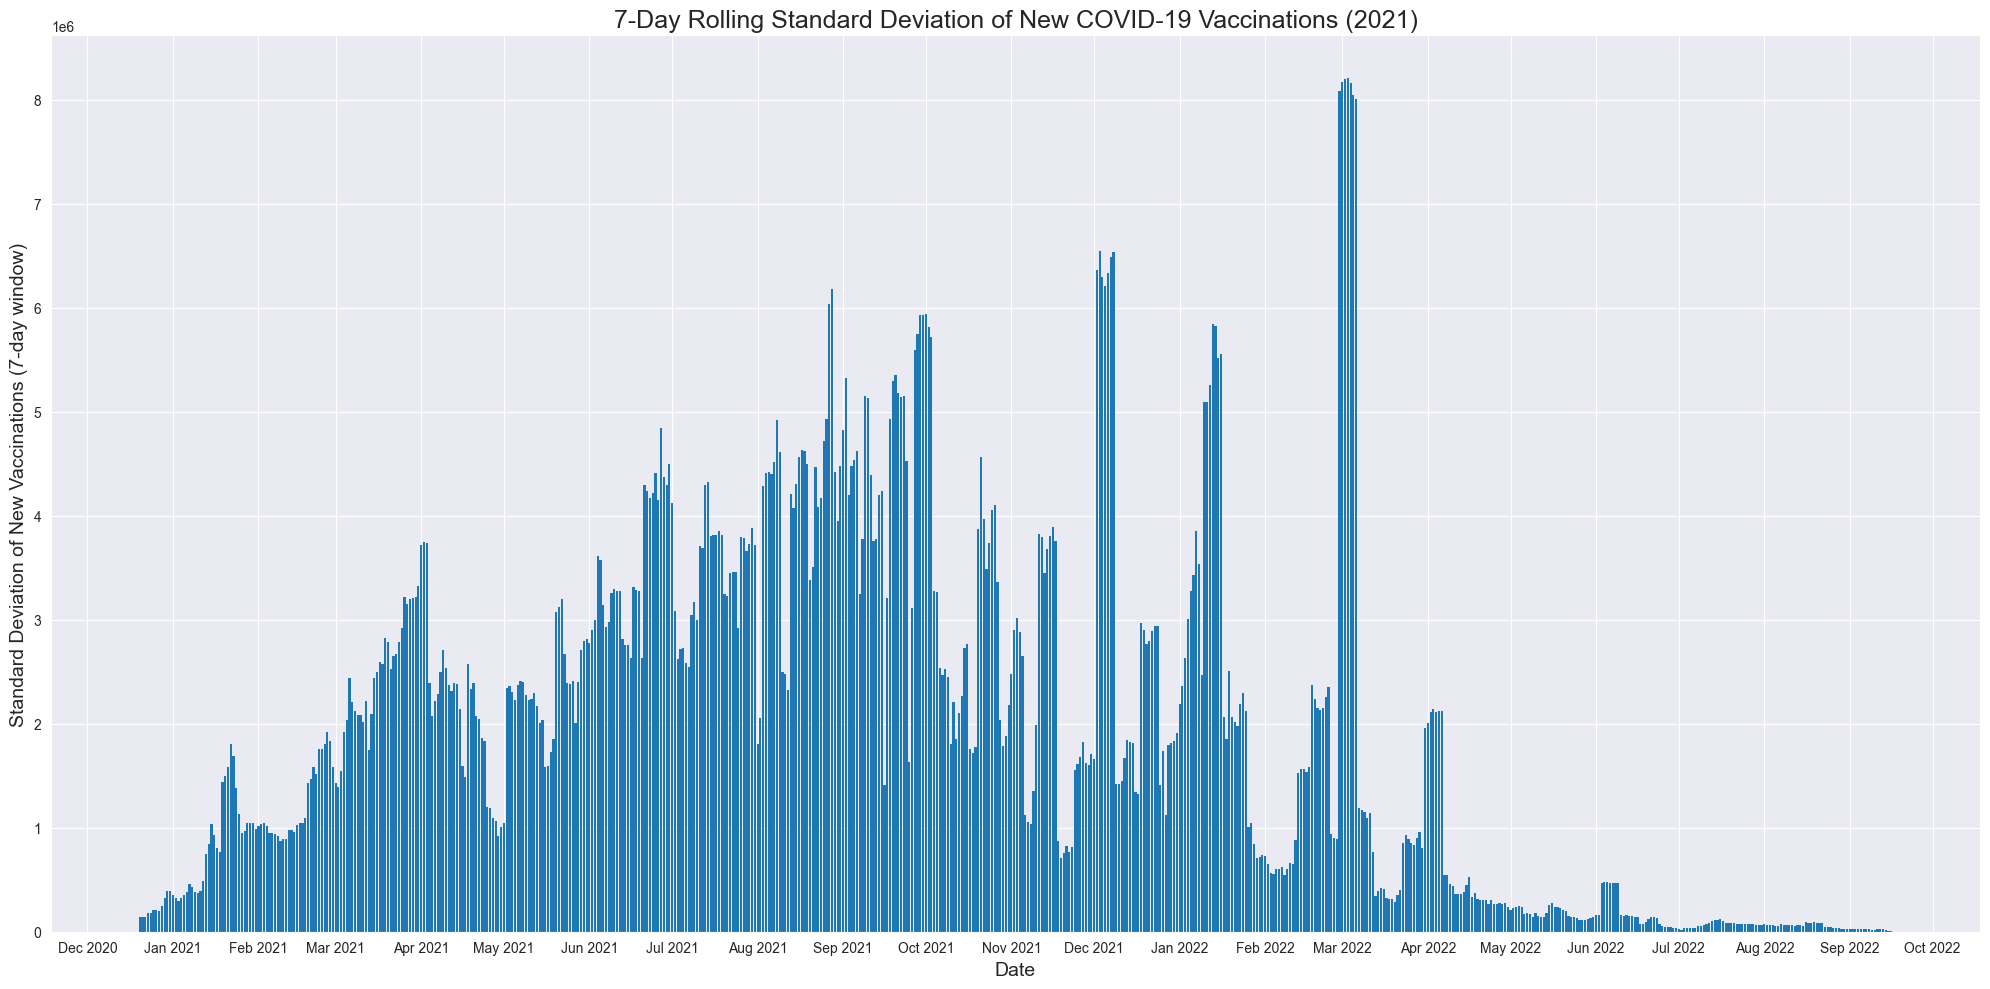

In [134]:
# Calculate 7-day rolling standard deviation for new vaccinations
df_daily['rolling_std_vaccinations'] = df_daily['new_persons_vaccinated'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_vaccinations'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Vaccinations (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Vaccinations (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.4.1 liczba osób w pełni zaszczepionych



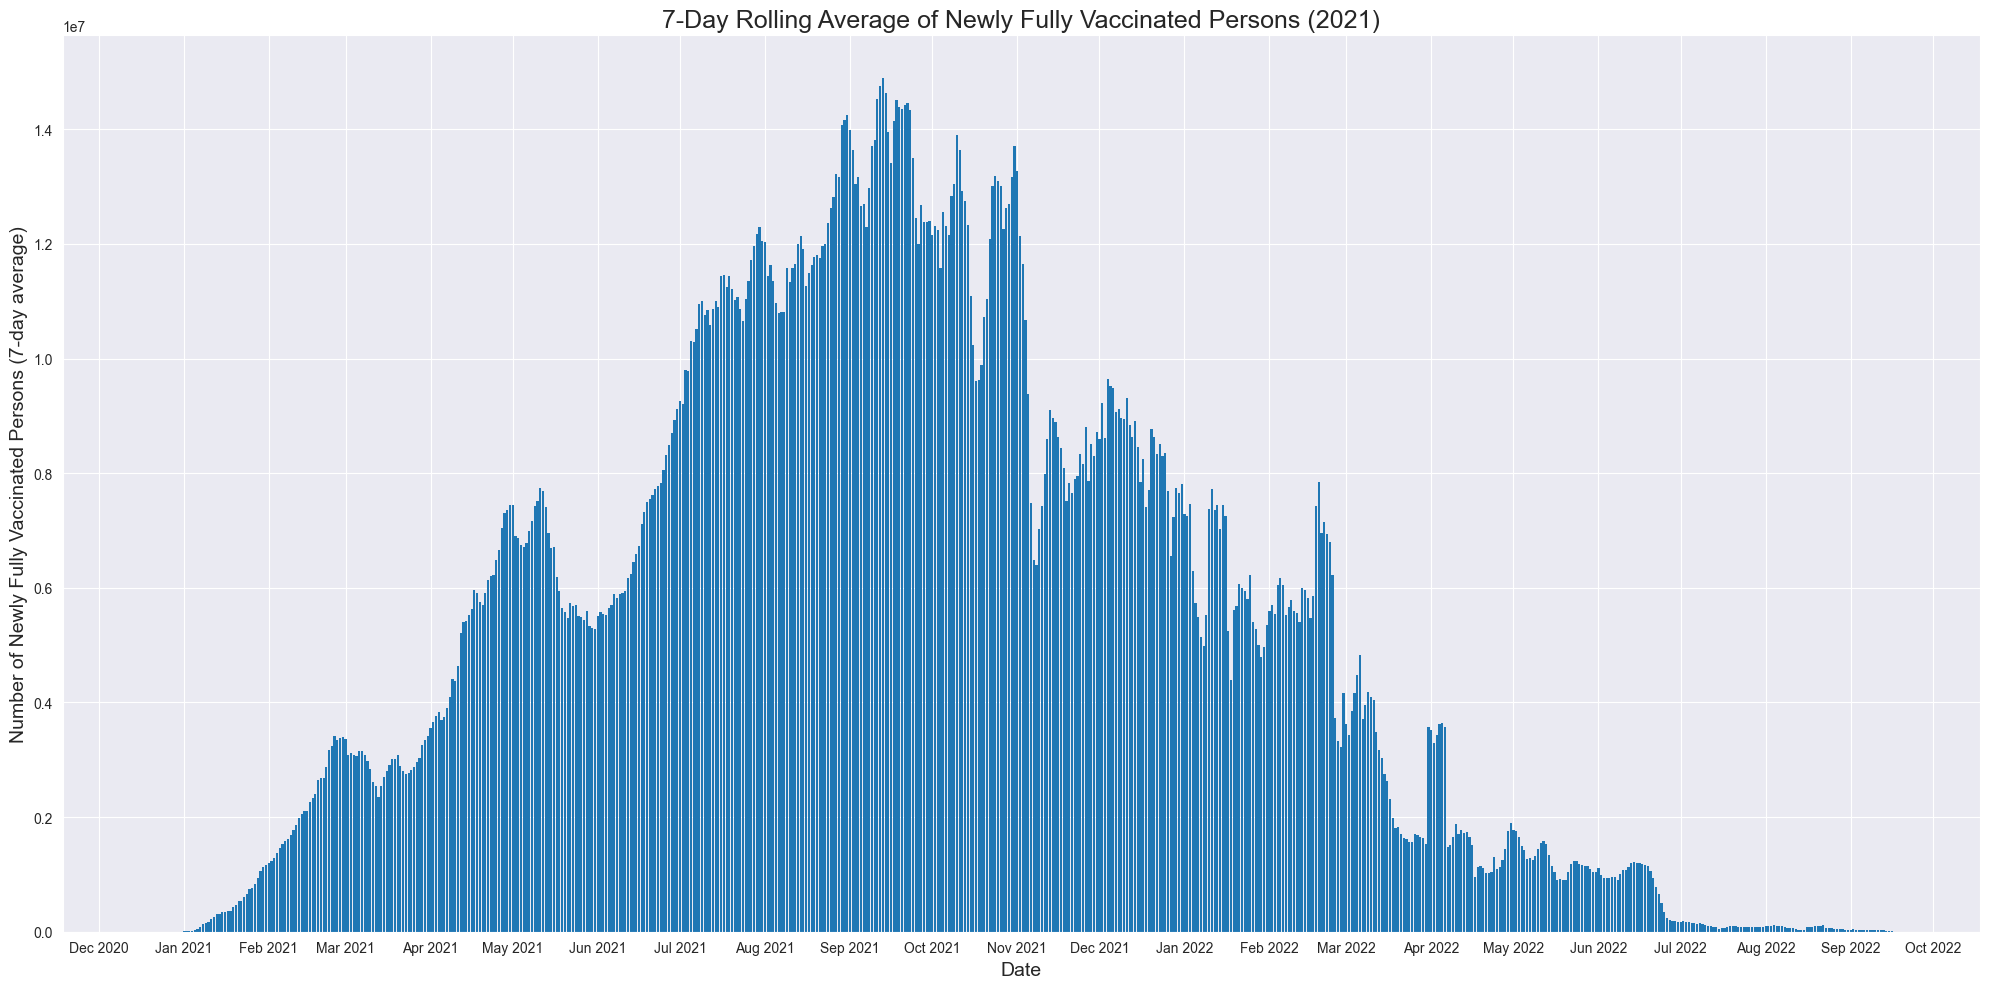

In [135]:
# Calculate 7-day rolling mean for fully vaccinated persons
df_daily['rolling_mean_fully_vaccinated'] = df_daily['new_persons_fully_vaccinated'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_fully_vaccinated'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of Newly Fully Vaccinated Persons (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Newly Fully Vaccinated Persons (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

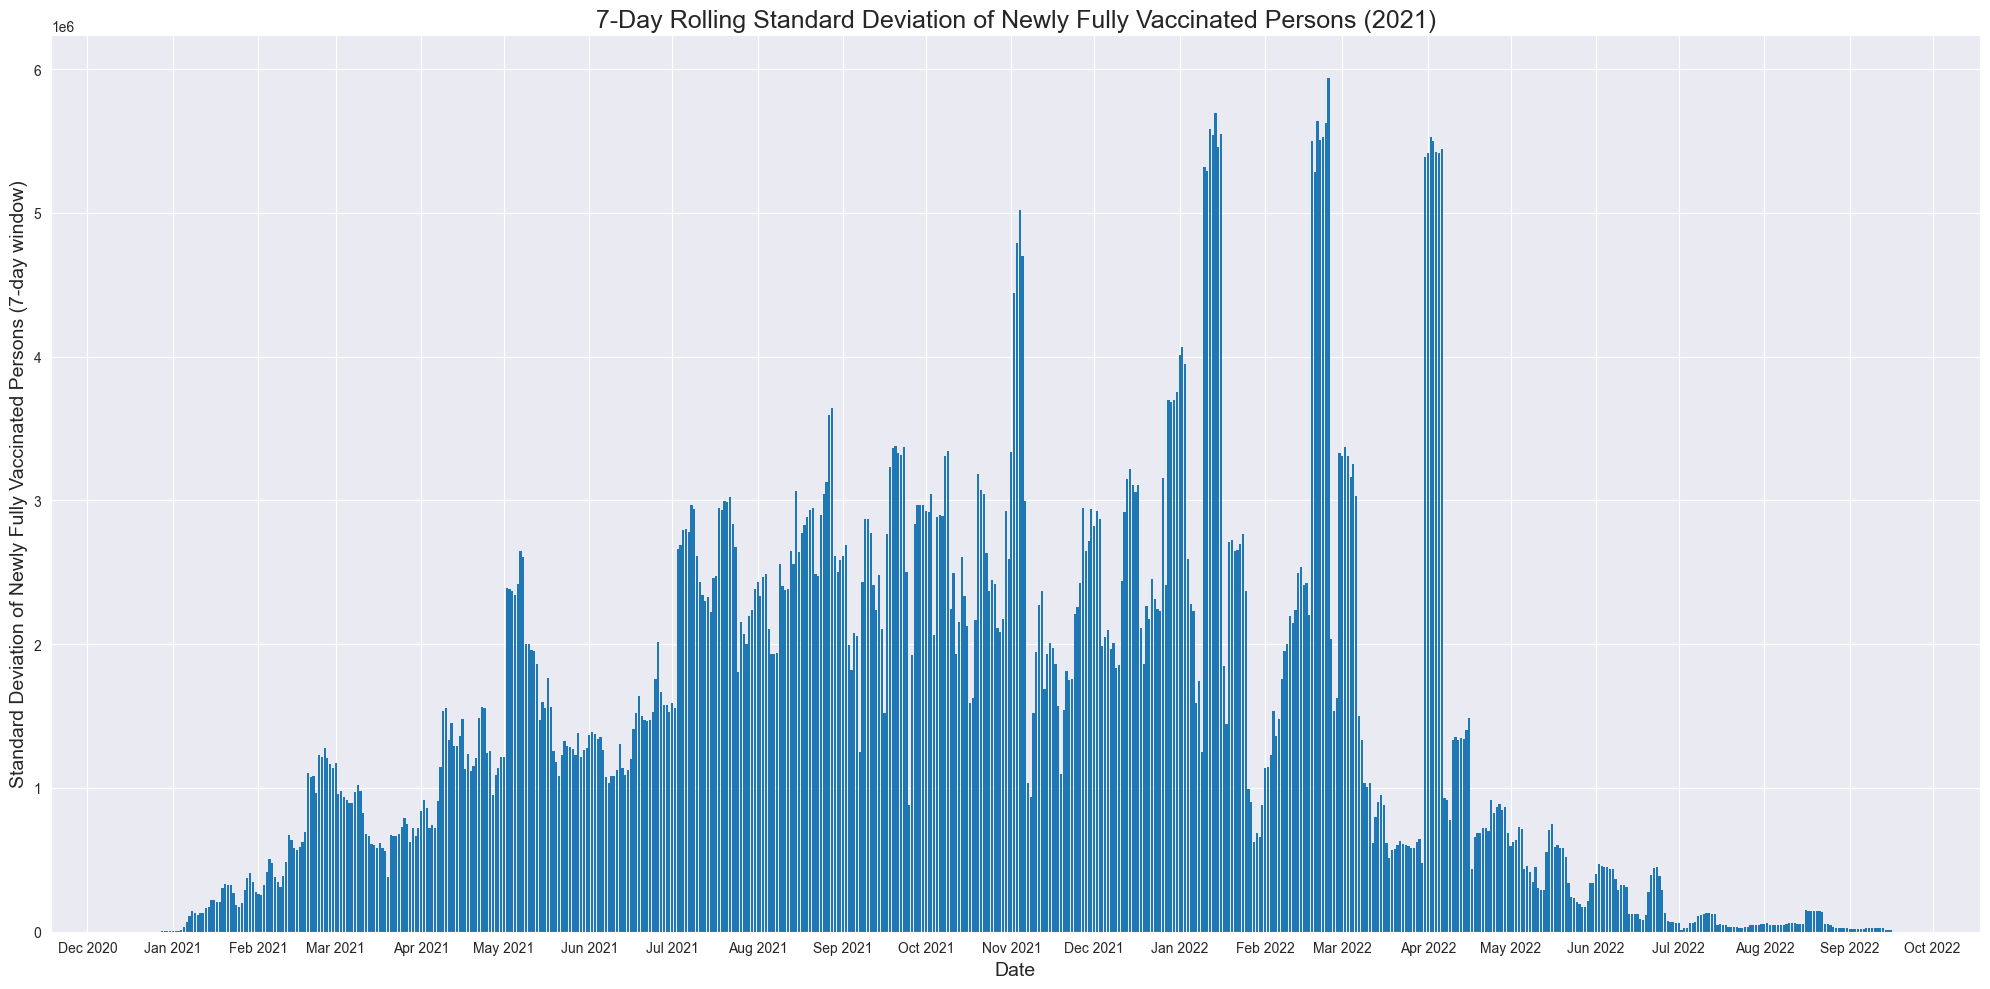

In [136]:
# Calculate 7-day rolling standard deviation for fully vaccinated persons
df_daily['rolling_std_fully_vaccinated'] = df_daily['new_persons_fully_vaccinated'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_fully_vaccinated'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of Newly Fully Vaccinated Persons (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of Newly Fully Vaccinated Persons (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.4.2 liczba zaaplikowanych szczepionek



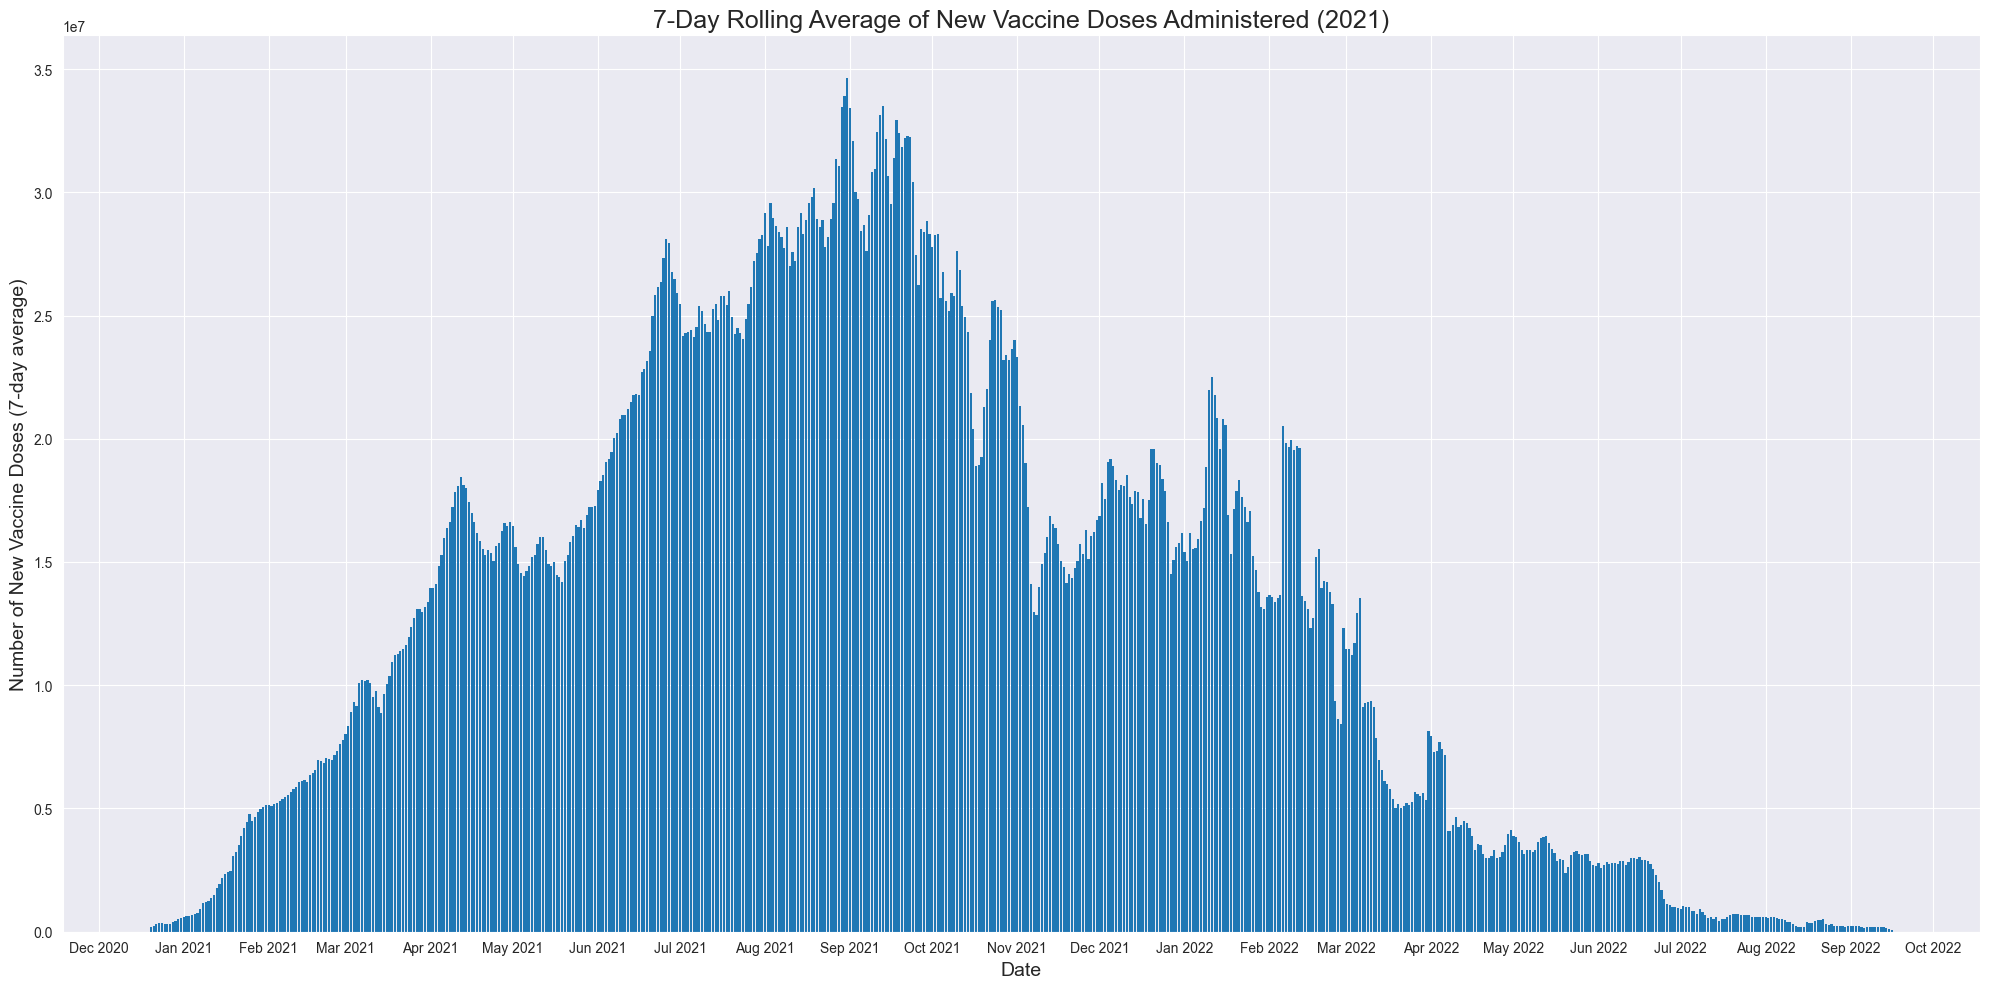

In [137]:
# Calculate 7-day rolling mean for vaccine doses administered
df_daily['rolling_mean_doses'] = df_daily['new_vaccine_doses_administered'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_doses'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New Vaccine Doses Administered (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccine Doses (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

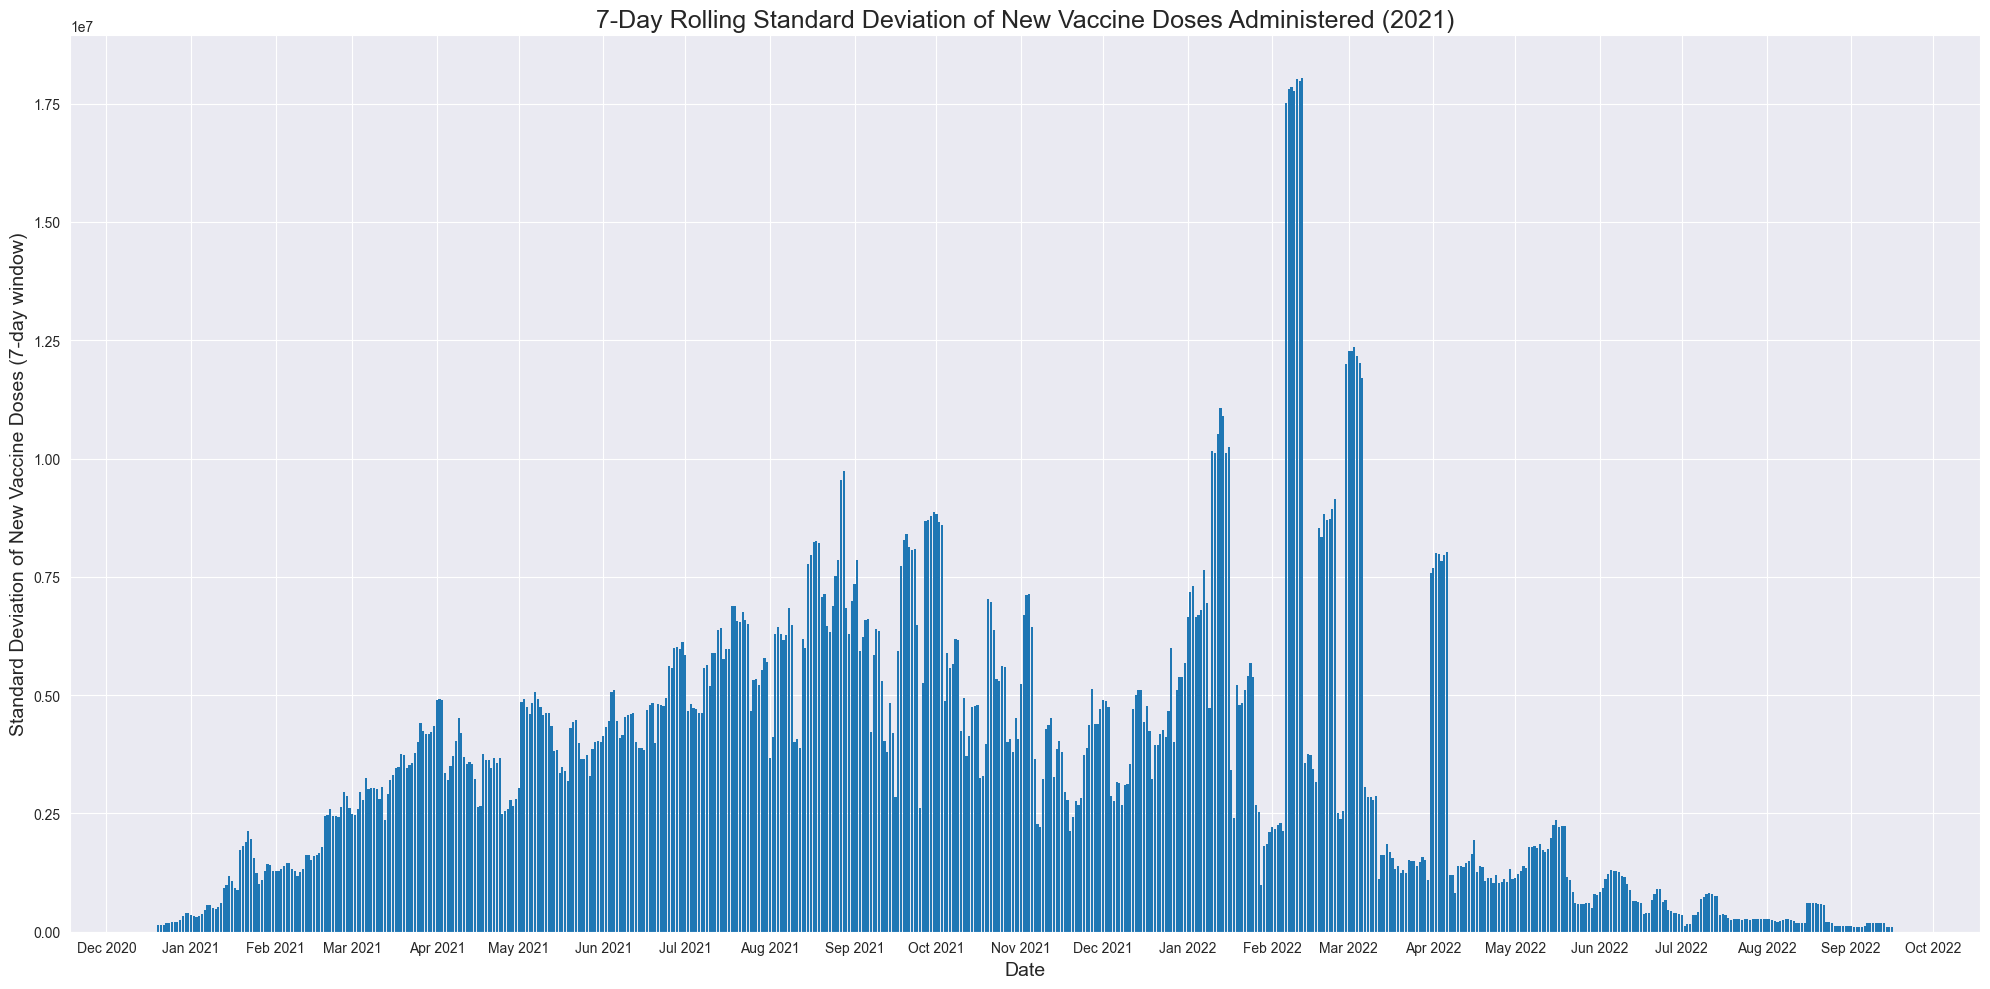

In [138]:
# Calculate 7-day rolling standard deviation for vaccine doses administered
df_daily['rolling_std_doses'] = df_daily['new_vaccine_doses_administered'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_doses'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New Vaccine Doses Administered (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Vaccine Doses (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


## Część 2

2.1 Analiza szeregu czasowego liczby nowych zachorowań

2.2 Analiza szeregu czasowego liczby nowych śmierci

2.3 Analiza szeregu czasowego liczby nowych szczepień

2.4 Analiza szeregu czasowego liczby osób w pełni zaszczepionych

2.5 Analiza szeregu czasowego liczby zaaplikowanych szczepionek

## Część 3

3.1 Liczba nowych zachorowań

Training Data Metrics:
MAE: 36862.90
MSE: 1723038841.36
R²: 0.51

Future Data Metrics:
MAE: 1530432.06
MSE: 3403600038194.93
R²: -23.78


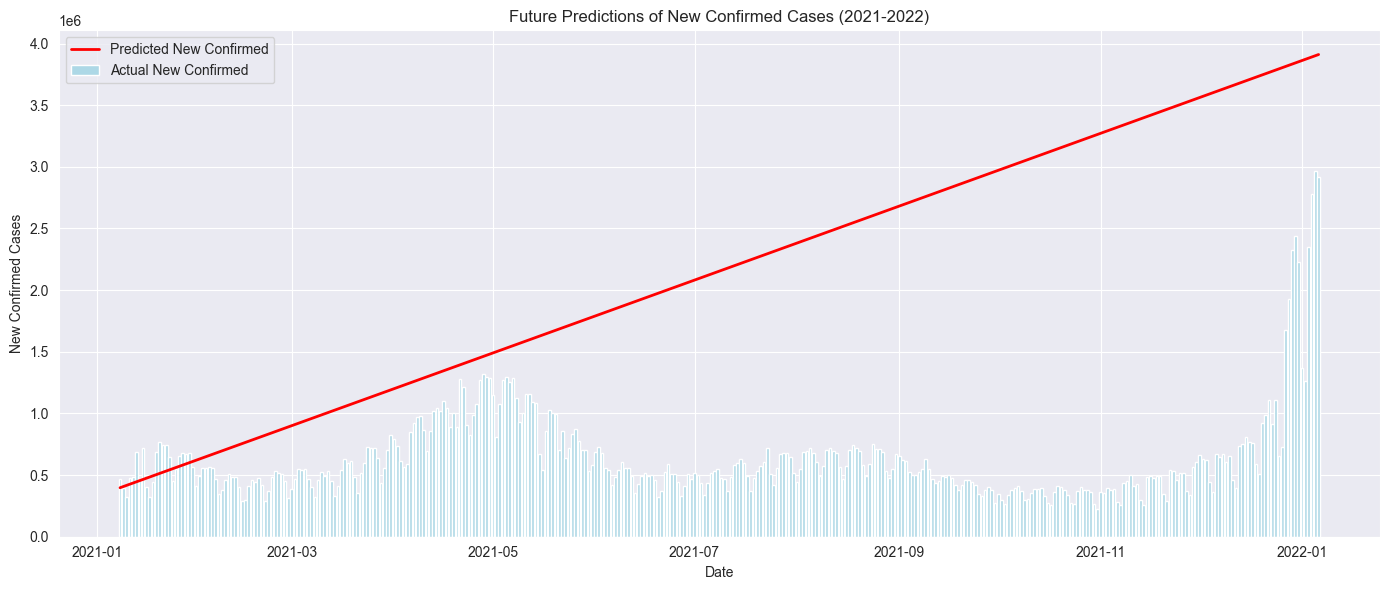


Analysis with shorter time periods (quarterly):


In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Linear regression for new confirmed cases
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1['new_confirmed'], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2['new_confirmed']

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.bar(df2['date'], df2['new_confirmed'], color='lightblue', label='Actual New Confirmed')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label='Predicted New Confirmed')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.title('Future Predictions of New Confirmed Cases (2021-2022)')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = ['2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2']
for quarter in quarters:
    quarter_data = df_daily[df_daily['Q'] == quarter]
    if len(quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data['new_confirmed']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"Quarter {quarter} - R²: {r2:.2f}")

3.2 Liczba nowych śmierci

Training Data Metrics:
MAE: 584.94
MSE: 575082.62
R²: 0.79

Future Data Metrics:
MAE: 29478.51
MSE: 1310744059.50
R²: -56.28


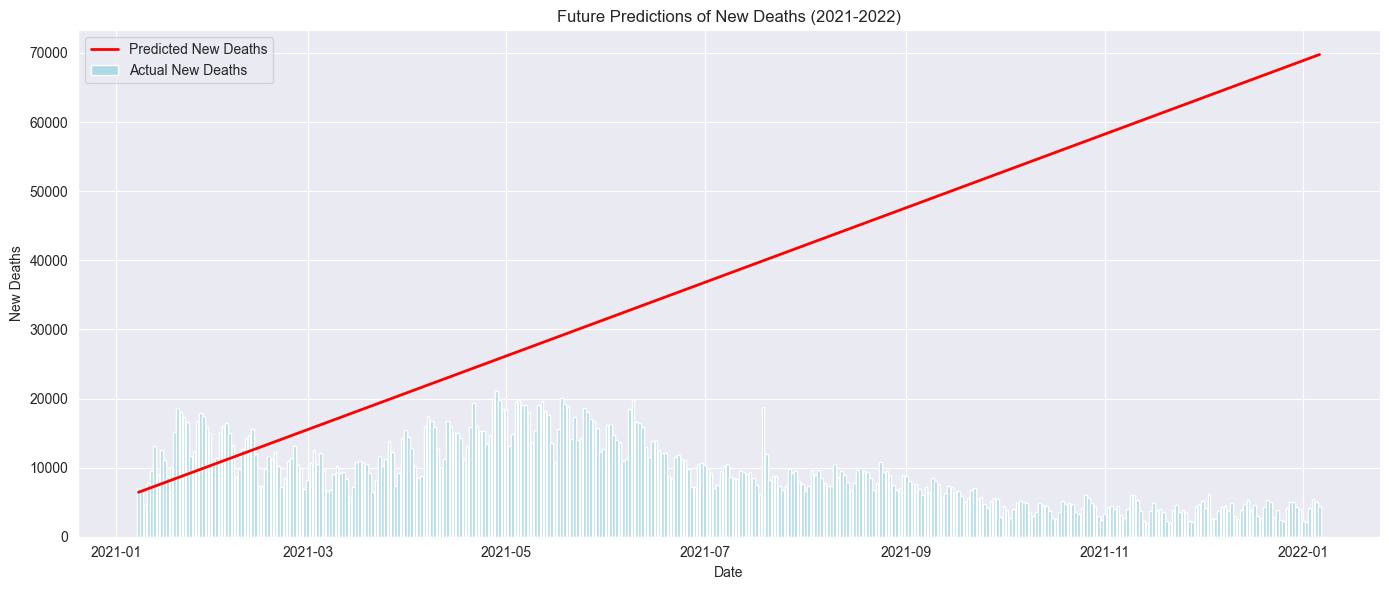


Analysis with shorter time periods (quarterly):


In [140]:
# Linear regression for new deaths
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1['new_deceased'], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2['new_deceased']

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.bar(df2['date'], df2['new_deceased'], color='lightblue', label='Actual New Deaths')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label='Predicted New Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.title('Future Predictions of New Deaths (2021-2022)')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = ['2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2']
for quarter in quarters:
    quarter_data = df_daily[df_daily['Q'] == quarter]
    if len(quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data['new_deceased']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"Quarter {quarter} - R²: {r2:.2f}")


3.3 Liczba nowych szczepień

Training Data Metrics:
MAE: 221871.88
MSE: 64196150615.18
R²: 0.64

Future Data Metrics:
MAE: 6238557.56
MSE: 55354526908670.53
R²: -0.66


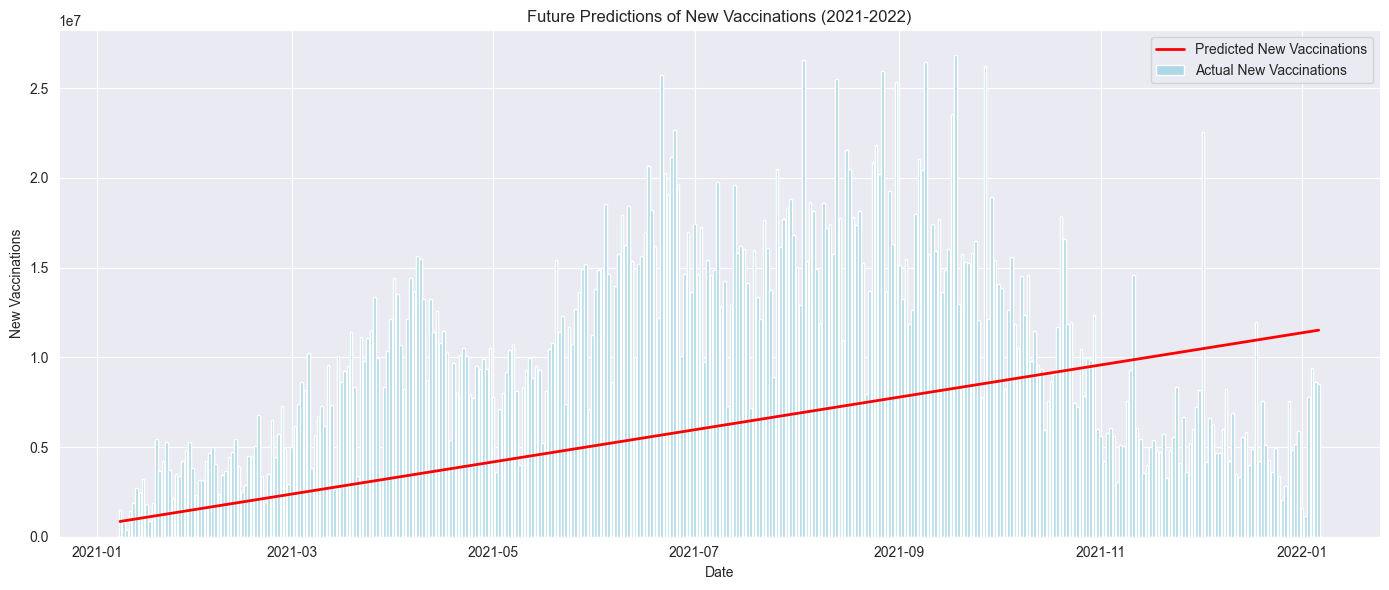


Analysis with shorter time periods (quarterly):


In [141]:
# Linear regression for new vaccinations
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1['new_persons_vaccinated'], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2['new_persons_vaccinated']

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.bar(df2['date'], df2['new_persons_vaccinated'], color='lightblue', label='Actual New Vaccinations')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label='Predicted New Vaccinations')
plt.xlabel('Date')
plt.ylabel('New Vaccinations')
plt.title('Future Predictions of New Vaccinations (2021-2022)')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = ['2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2']
for quarter in quarters:
    quarter_data = df_daily[df_daily['Q'] == quarter]
    if len(quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data['new_persons_vaccinated']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"Quarter {quarter} - R²: {r2:.2f}")


3.4.1 Liczba osób w pełni zaszczepionych

Training Data Metrics:
MAE: 20675.21
MSE: 653542871.80
R²: 0.44

Future Data Metrics:
MAE: 7107782.85
MSE: 68387095213309.41
R²: -2.50


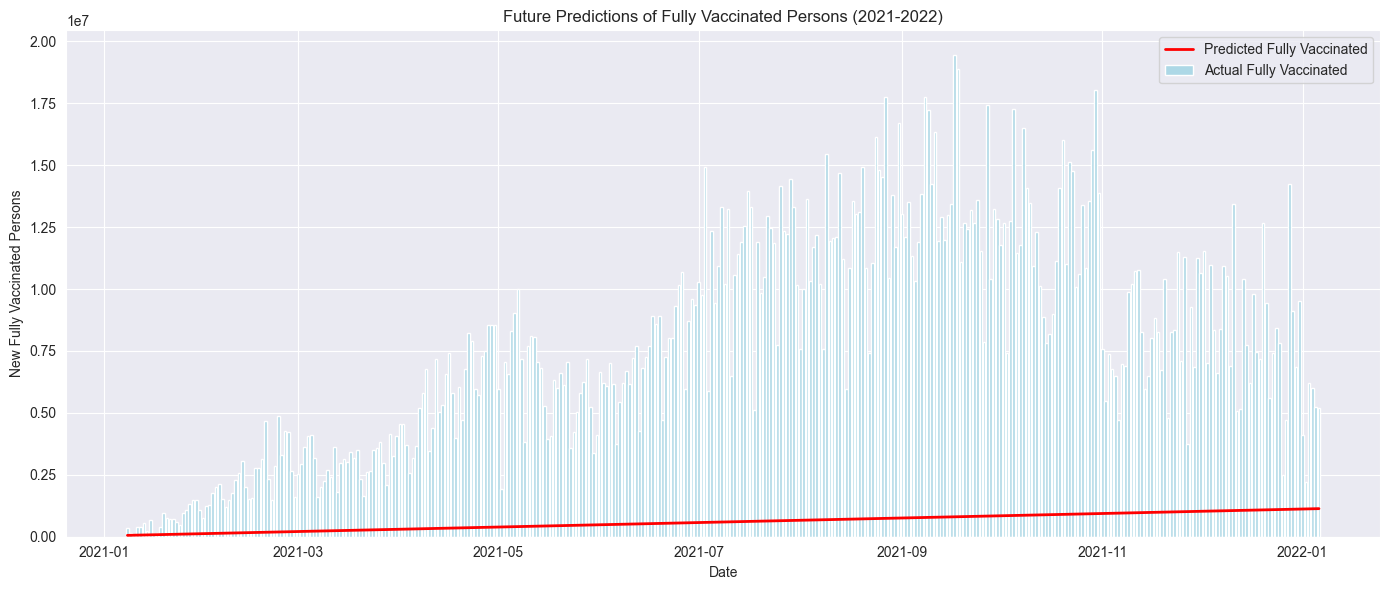


Analysis with shorter time periods (quarterly):


In [142]:
# Linear regression for fully vaccinated persons
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1['new_persons_fully_vaccinated'], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2['new_persons_fully_vaccinated']

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.bar(df2['date'], df2['new_persons_fully_vaccinated'], color='lightblue', label='Actual Fully Vaccinated')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label='Predicted Fully Vaccinated')
plt.xlabel('Date')
plt.ylabel('New Fully Vaccinated Persons')
plt.title('Future Predictions of Fully Vaccinated Persons (2021-2022)')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = ['2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2']
for quarter in quarters:
    quarter_data = df_daily[df_daily['Q'] == quarter]
    if len(quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data['new_persons_fully_vaccinated']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"Quarter {quarter} - R²: {r2:.2f}")


3.4.2 Liczba zaaplikowanych szczepionek

Training Data Metrics:
MAE: 166976.46
MSE: 47035751739.51
R²: 0.79

Future Data Metrics:
MAE: 11650300.09
MSE: 195352577744615.03
R²: -1.31


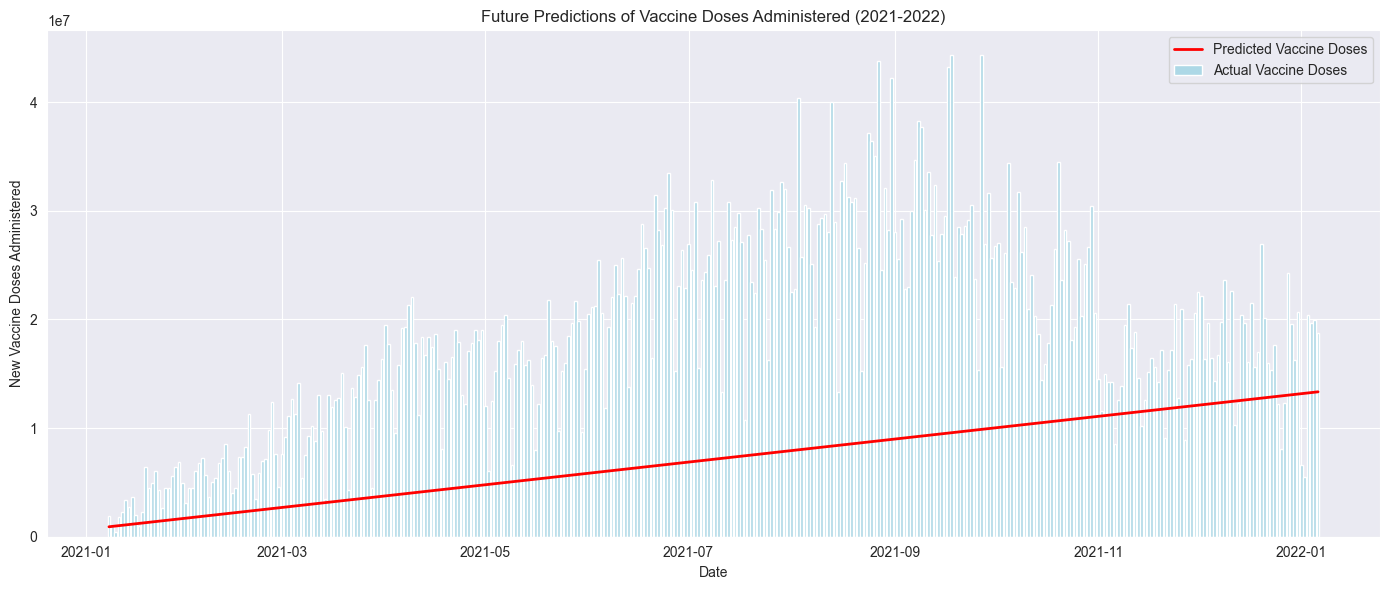


Analysis with shorter time periods (quarterly):


In [143]:
# Linear regression for vaccine doses administered
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1['new_vaccine_doses_administered'], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2['new_vaccine_doses_administered']

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.bar(df2['date'], df2['new_vaccine_doses_administered'], color='lightblue', label='Actual Vaccine Doses')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label='Predicted Vaccine Doses')
plt.xlabel('Date')
plt.ylabel('New Vaccine Doses Administered')
plt.title('Future Predictions of Vaccine Doses Administered (2021-2022)')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = ['2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2']
for quarter in quarters:
    quarter_data = df_daily[df_daily['Q'] == quarter]
    if len(quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data['new_vaccine_doses_administered']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"Quarter {quarter} - R²: {r2:.2f}")


## Podsumowanie i analiza wyników


Summary of R² values for all metrics:
             Metric  R² (Training)  R² (Future)
0         New Cases       0.451327   -21.644662
1        New Deaths       0.604549   -56.540832
2  New Vaccinations       0.174451    -0.448242
3  Fully Vaccinated     -35.537768    -2.399601
4     Vaccine Doses       0.151428    -0.932057


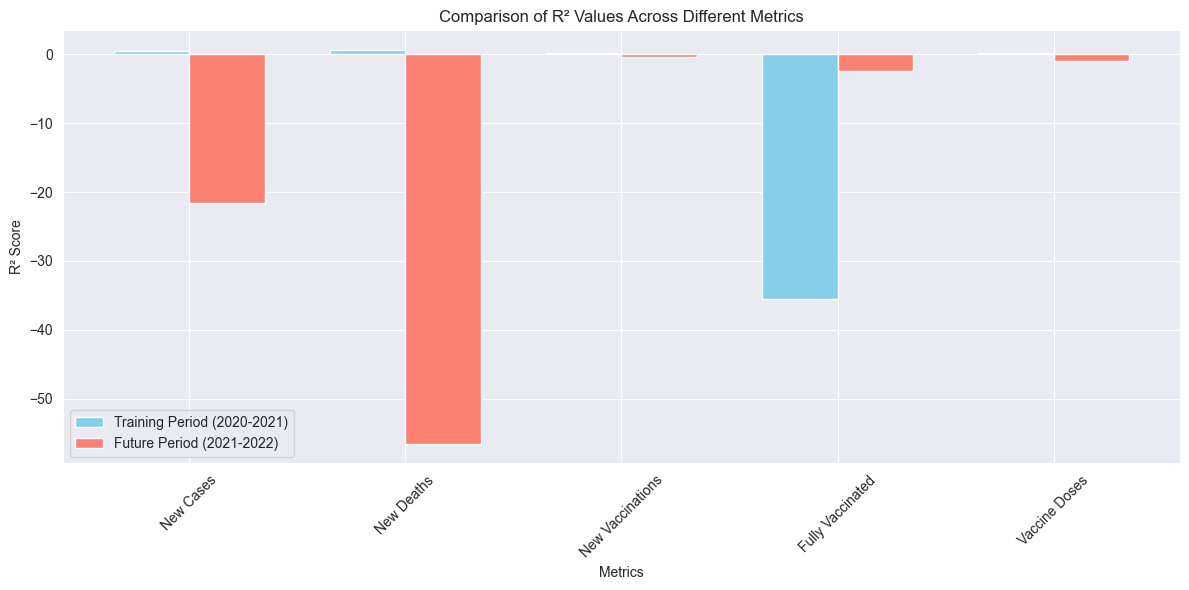


Analysis of quarterly results:


In [144]:
# Create a summary of R² values for all metrics
print("Summary of R² values for all metrics:")
metrics = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']
metric_names = ['New Cases', 'New Deaths', 'New Vaccinations', 'Fully Vaccinated', 'Vaccine Doses']

# Create dataframe for full period analysis
r2_values = []
for metric in metrics:
    df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')]
    X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[metric], test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Future predictions
    df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
    X_future, y_future = df2[['data_num']], df2[metric]
    y_future_pred = model.predict(X_future)
    r2_future = r2_score(y_future, y_future_pred)

    r2_values.append({'Metric': metric_names[metrics.index(metric)], 
                      'R² (Training)': r2, 
                      'R² (Future)': r2_future})

r2_df = pd.DataFrame(r2_values)
print(r2_df)

# Create a bar chart to compare R² values
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(metric_names))

plt.bar(x - bar_width/2, r2_df['R² (Training)'], bar_width, label='Training Period (2020-2021)', color='skyblue')
plt.bar(x + bar_width/2, r2_df['R² (Future)'], bar_width, label='Future Period (2021-2022)', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('R² Score')
plt.title('Comparison of R² Values Across Different Metrics')
plt.xticks(x, metric_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Analysis of quarterly results
print("\nAnalysis of quarterly results:")
quarters = ['2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2']
quarterly_r2 = {}

for metric in metrics:
    quarterly_r2[metric] = []
    for quarter in quarters:
        quarter_data = df_daily[df_daily['Q'] == quarter]
        if len(quarter_data) > 10:
            X = quarter_data[['data_num']]
            y = quarter_data[metric]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            quarterly_r2[metric].append({'Quarter': quarter, 'R²': r2})
        else:
            quarterly_r2[metric].append({'Quarter': quarter, 'R²': None})

# Create a heatmap of quarterly R² values
quarterly_data = []
for i, metric in enumerate(metrics):
    for q_data in quarterly_r2[metric]:
        if q_data['R²'] is not None:
            quarterly_data.append({
                'Metric': metric_names[i],
                'Quarter': q_data['Quarter'],
                'R²': q_data['R²']
            })

if quarterly_data:
    q_df = pd.DataFrame(quarterly_data)
    q_pivot = q_df.pivot(index='Metric', columns='Quarter', values='R²')

    plt.figure(figsize=(12, 8))
    sns.heatmap(q_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('R² Values by Metric and Quarter')
    plt.tight_layout()
    plt.show()
